In [3]:
#Hand Written Recognisation
import os
import cv2
import matplotlib as plt
import tensorflow as tf
from tensorflow import keras

In [2]:
#check the tensorflow version
print(tf.keras.__version__)

3.7.0


In [14]:
minist_Dataset = keras.datasets.cifar100
minist_Dataset

<module 'keras.api.datasets.cifar100' from 'D:\\anaconda\\Lib\\site-packages\\keras\\api\\datasets\\cifar100\\__init__.py'>

In [15]:
#Split train and test
(X_train,Y_train),(X_test,Y_test) = minist_Dataset.load_data()

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 21s 0us/step


In [17]:
data= X_train.shape
len(data)

4

In [20]:
row, h, w,c= data
h

32

In [18]:
# Data exploration
len(X_train)

60000

In [6]:
# we can see that the image size is 28*28 we need to reshape to achieve 784 neurons
total_neurons = 28*28
print(total_neurons)
x_train = X_train.reshape(60000,total_neurons)
x_test = X_test.reshape(10000,total_neurons)

784


In [7]:
#normalise data
#x_train = x_train/255
#x_test = x_test/255


x_train = tf.keras.utils.normalize(x_train,axis=1)
x_test  = tf.keras.utils.normalize(x_test ,axis=1)
#one hot encoding the labesl
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(Y_train,10)
y_test = to_categorical(Y_test,10)

In [8]:
#Building Neural Network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

model = Sequential([
    Dense(128,activation = 'relu',input_shape = (total_neurons,)),
    Dropout(0.2),
    Dense(64,activation='relu'),
    Dense(10,activation='softmax'),
])

D:\anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.compile(optimizer = 'adam',loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train,y_train,epochs = 10,batch_size =32, validation_split=0.2)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7822 - loss: 0.7594 - val_accuracy: 0.9393 - val_loss: 0.2100
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9340 - loss: 0.2251 - val_accuracy: 0.9570 - val_loss: 0.1485
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9530 - loss: 0.1566 - val_accuracy: 0.9619 - val_loss: 0.1223
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9660 - loss: 0.1146 - val_accuracy: 0.9684 - val_loss: 0.1064
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9679 - loss: 0.1021 - val_accuracy: 0.9701 - val_loss: 0.0974
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9745 - loss: 0.0823 - val_accuracy: 0.9722 - val_loss: 0.0960
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9764 - loss: 0.0736 - val_accuracy: 0.9741 - val_loss: 0.0911
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9792 - loss: 0.0643 - 

In [12]:
model.save('my_model.keras')

In [15]:
model.save('saved_model/my_model', save_format='tf')


ValueError: The `save_format` argument is deprecated in Keras 3. Please remove this argument and pass a file path with either `.keras` or `.h5` extension.Received: save_format=tf

In [ ]:
loss,accuracy = model.evaluate(x_test,y_test)
accuracy

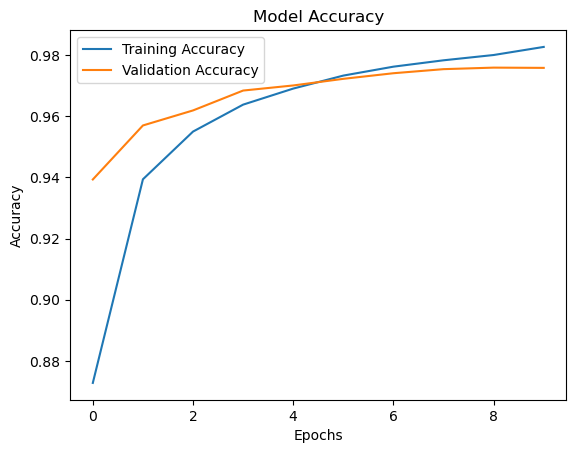

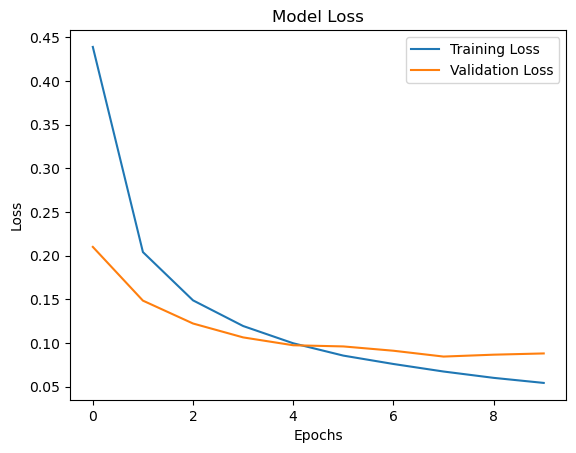

In [16]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.show()


In [17]:
predictions = model.predict(x_test)
print("Predicted labels for first 10 samples:", predictions[:10].argmax(axis=1))


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Predicted labels for first 10 samples: [7 2 1 0 4 1 4 9 5 9]


In [1]:
from ImageClassification import ImageClassification

#Hand Written Recognisation
import os
import cv2
import matplotlib as plt
import tensorflow as tf
from tensorflow import keras
minist_Dataset = keras.datasets.mnist
classes = 10
obj = ImageClassification(minist_Dataset,classes)
model, history, loss, accuracy = obj.generate_mode("mnist_image_classifier")
print(accuracy)

D:\anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7888 - loss: 0.7423 - val_accuracy: 0.9437 - val_loss: 0.1971
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9358 - loss: 0.2149 - val_accuracy: 0.9566 - val_loss: 0.1443
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9552 - loss: 0.1492 - val_accuracy: 0.9651 - val_loss: 0.1206
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9649 - loss: 0.1156 - val_accuracy: 0.9698 - val_loss: 0.1016
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9701 - loss: 0.0986 - val_accuracy: 0.9716 - val_loss: 0.0942
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9751 - loss: 0.0809 - val_accuracy: 0.9718 - val_loss: 0.0915
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9762 - loss: 0.0726 - val_accuracy: 0.9743 - val_loss: 0.0847
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9800 - loss: 0.0616 - 

In [8]:
beans_Dataset = keras.datasets
classes = 3
for data in dir(beans_Dataset):
    print(data)

__builtins__
__cached__
__doc__
__file__
__loader__
__name__
__package__
__path__
__spec__
boston_housing
california_housing
cifar10
cifar100
fashion_mnist
imdb
mnist
reuters


In [9]:

fash_dataset = keras.datasets.fashion_mnist
obj = ImageClassification(fash_dataset,10)
model, history, loss, accuracy = obj.generate_mode("fash_dataset")
print(accuracy)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.7057 - loss: 0.8747 - val_accuracy: 0.8360 - val_loss: 0.4415
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8432 - loss: 0.4297 - val_accuracy: 0.8532 - val_loss: 0.3971
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8534 - loss: 0.3993 - val_accuracy: 0.8584 - val_loss: 0.3834
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8658 - loss: 0.3624 - val_accuracy: 0.8751 - val_loss: 0.3486
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8733 - loss: 0.3466 - val_accuracy: 0.8789 - val_loss: 0.3349
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8786 - loss: 0.3283 - val_accuracy: 0.8772 - val_loss: 0.3362
Epoch 7/10
1500/1500 ━━━━━━━━━━

In [21]:
#cifar10
from ImageClassification import ImageClassification
object_dataset = keras.datasets.cifar10
obj = ImageClassification(object_dataset,10)
model, history, loss, accuracy = obj.generate_mode("onn")
print(accuracy)

ValueError: cannot reshape array of size 153600000 into shape (50000,1024)